<div>
    <img src="images/emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
    <span>
        <h1 style="padding-bottom:5px;"> AI Booster Week 02 - Python for Data Science </h1>
        <a href="https://masters.em-lyon.com/fr/msc-in-data-science-artificial-intelligence-strategy">[Emlyon]</a> MSc in Data Science & Artificial Intelligence Strategy (DSAIS) <br/>
         Paris | © Antoine SCHERRER
    </span>
</div>

## General instructions

Your job in this exam is to study a dataset, in a similar way you analyzed the project's dataset on the second week of AI Booster.

After question 3 (when you have a clean dataset), every question is independent (you should not spend more than 10m on a question).

You are free to use course material and go online, but you **cannot use generative AI** and you **cannot to communicate with each other**.

## Authorized libraries

These are the libraries you can use:

 - `pandas`
 - `scipy`
 - `numpy`
 - `statistics`
 - `matplotlib`
 - `seaborn`


In [1]:
#THOMAS Romain

In [2]:
# Basic imports
import pandas as pd
import numpy as np
import scipy as sc
import math
import matplotlib.pyplot as plt
import seaborn as sb

### 1 - Load the dataset

Load the `churn_unclean.csv` dataset in a dataframe.

This is a very classical classification dataset, where the obective is to predict the last column (whether a given customer exited).

Take the time to look at each column, print out the qualitative columns and quantitative one separately. *Be careful, numerical data can sometimes be used for categorical variables!* 

In [3]:
## YOUR ANSWER HERE
df = pd.read_csv('churn_unclean.csv', delimiter=',', encoding='utf-8', index_col=0)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9762 non-null   object 
 2   CreditScore      9762 non-null   float64
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB


In [5]:
for i in df.columns:
    print(i)
    print(df[i].unique())

CustomerId
[15634602 15647311 15619304 ... 15584532 15682355 15628319]
Surname
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore
[619. 608. 502. 699. 850. 645. 822. 376. 501. 684. 528. 497. 476. 549.
 635. 616. 653. 587. 726. 732. 636. 510. 669. 846. 577. 756. 571. 574.
 411. 591. 533. 553. 520. 722. 475. 490. 804. 582. 472. 465. 556. 834.
 660. 776. 829. 637. 550. 698. 585. 788. 655. 601. 656. 725. 511. 614.
 742. 687. 555. 603. 751. 581. 735. 661. 675. 738. 813. 657. 604. 519.
 664. 678. 757. 416. 665. 777. 543. 506. 493. 652. 750. 729. 646. 647.
 808. 524. 769. 730. 515. 773. 814. 710. 413. 623.  nan 670. 622. 785.
 605. 479. 685. 538. 562. 721. 628. 668. 828. 674. 625. 432. 770. 758.
 795. 686. 789. 589. 461. 584. 579. 663. 682. 793. 691. 485. 650. 754.
 535. 716. 539. 706. 586. 631. 717. 800. 683. 704. 615. 667. 484. 480.
 578. 512. 606. 597. 778. 514. 525. 715. 580. 807. 521. 759. 516. 711.
 618. 643. 671. 689. 620. 676. 572. 695. 592. 567. 694. 547. 59

In [6]:
for i in df.columns:
    display(df[i].value_counts())

15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64

Smith       31
Martin      29
Scott       27
Walker      26
Shih        25
            ..
Hassall      1
Toosey       1
Angel        1
Moysey       1
Burbidge     1
Name: Surname, Length: 2886, dtype: int64

850.0    224
678.0     60
655.0     53
705.0     52
667.0     52
        ... 
399.0      1
363.0      1
417.0      1
830.0      1
419.0      1
Name: CreditScore, Length: 459, dtype: int64

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Male      5457
Female    4543
Name: Gender, dtype: int64

37     476
38     473
35     473
36     456
34     444
      ... 
361      1
526      1
498      1
490      1
527      1
Name: Age, Length: 122, dtype: int64

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

0.00         3611
130170.82       2
105473.74       2
85859.76        1
144238.70       1
             ... 
108698.96       1
238387.56       1
111833.47       1
126619.27       1
130142.79       1
Name: Balance, Length: 6388, dtype: int64

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

1    7055
0    2945
Name: HasCrCard, dtype: int64

1    5151
0    4849
Name: IsActiveMember, dtype: int64

24924.92     2
101348.88    1
55313.44     1
72500.68     1
182692.80    1
            ..
120893.07    1
188377.21    1
55902.93     1
4523.74      1
38190.78     1
Name: EstimatedSalary, Length: 9999, dtype: int64

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
cat_cols=['Geography', 'Gender', 'NumOfProducts', 'HasCrCard','IsActiveMember',]

In [9]:
quant_cols=['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary',]

In [10]:
for i in cat_cols:
    df[i]=df[i].astype("category")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       10000 non-null  int64   
 1   Surname          9762 non-null   object  
 2   CreditScore      9762 non-null   float64 
 3   Geography        10000 non-null  category
 4   Gender           10000 non-null  category
 5   Age              10000 non-null  int64   
 6   Tenure           10000 non-null  int64   
 7   Balance          10000 non-null  float64 
 8   NumOfProducts    10000 non-null  category
 9   HasCrCard        10000 non-null  category
 10  IsActiveMember   10000 non-null  category
 11  EstimatedSalary  10000 non-null  float64 
 12  Exited           10000 non-null  int64   
dtypes: category(5), float64(3), int64(4), object(1)
memory usage: 752.6+ KB


In [12]:
df.describe(include="all")

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,9762,9762.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.000000,10000.000000
unique,NaN,2886,NaN,3,2,NaN,NaN,NaN,4.0,2.0,2.0,NaN,NaN
top,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN
freq,NaN,31,NaN,5014,5457,NaN,NaN,NaN,5084.0,7055.0,5151.0,NaN,NaN
mean,1.569094e+07,NaN,650.178447,NaN,NaN,41.014200,5.012800,76219.690670,NaN,NaN,NaN,100090.239881,0.203700
std,7.193619e+04,NaN,96.581514,NaN,NaN,30.787637,2.892174,62460.034761,NaN,NaN,NaN,57510.492818,0.402769
min,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,-9873.000000,NaN,NaN,NaN,11.580000,0.000000
25%,1.562853e+07,NaN,583.250000,NaN,NaN,32.000000,3.000000,0.000000,NaN,NaN,NaN,51002.110000,0.000000
50%,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,96948.895000,NaN,NaN,NaN,100193.915000,0.000000
75%,1.575323e+07,NaN,717.000000,NaN,NaN,44.000000,7.000000,127554.630000,NaN,NaN,NaN,149388.247500,0.000000


In [13]:
def univ_cat(column,title):
    
    fig, ax = plt.subplots(1,2, figsize=(8, 3))
    
    ax[0].bar(column.value_counts().index,column.value_counts())
    ax[0].set_title(title)
    ax[1].pie(column.value_counts(),labels=column.value_counts().index, autopct='%1.1f%%')
    ax[1].set_title(title)
    
    plt.tight_layout()
    plt.show()

def univ_num(column,title):
    fig, ax = plt.subplots(1,2, figsize=(8, 3))
    ax[0].hist(column, bins=15, edgecolor='gray', color='skyblue')
    ax[0].set_title(title)
    ax[1].boxplot(column)
    ax[1].set_title(title)
    
    plt.tight_layout()
    plt.show()

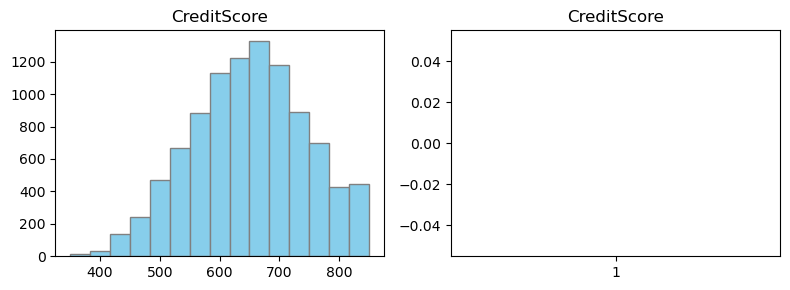

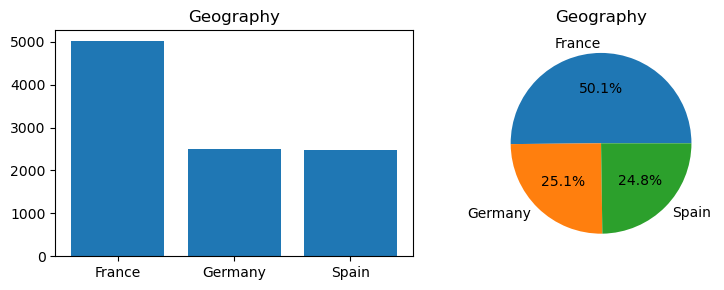

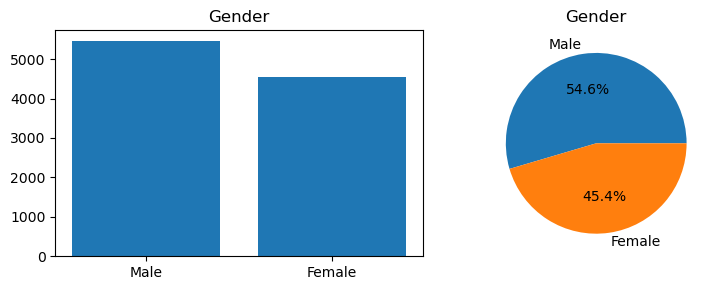

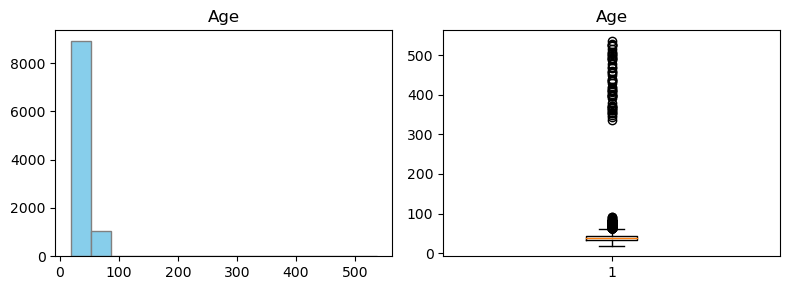

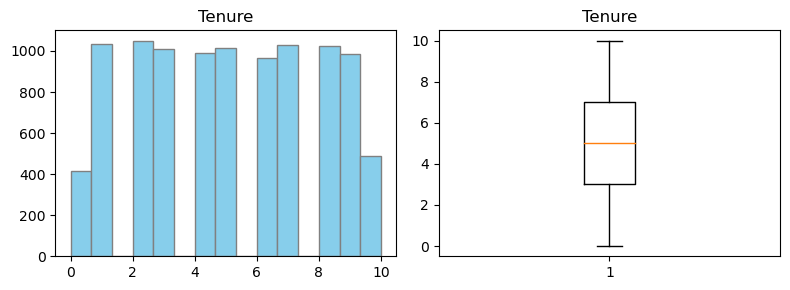

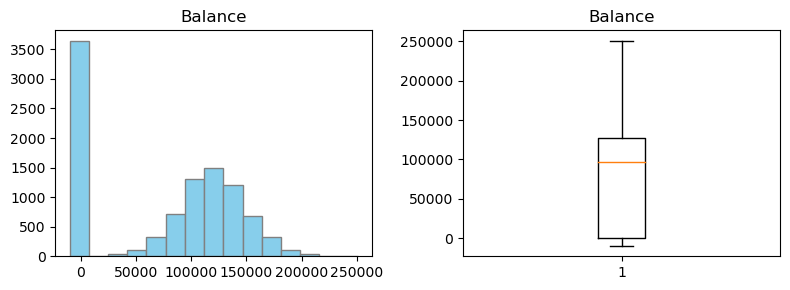

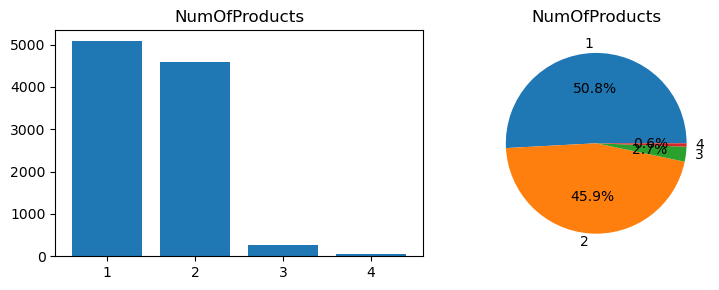

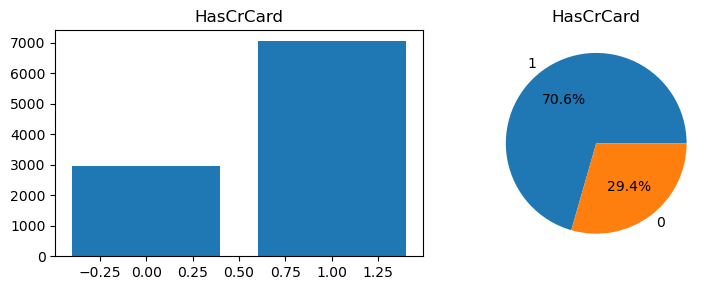

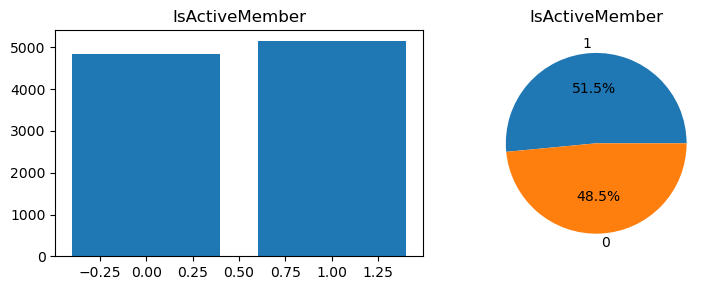

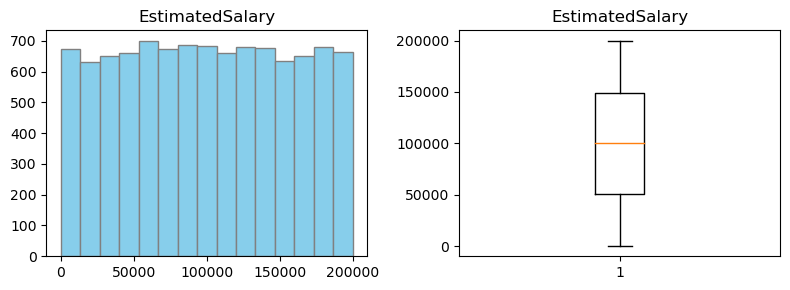

In [14]:
for i, column in enumerate(list(df.columns)):
    
    if column in quant_cols:
        univ_num(df[column],column)
        
    if column in cat_cols:
        univ_cat(df[column],column)

### 2 - Cleanup dataset 1/2

Get rid of rows including null values. Print out the number of rows deleted.

Get rid of the `RowNumber`, `CustomerId` and `Surname` columns.


In [27]:
df2=df.copy()

In [28]:
## YOUR ANSWER HERE
original_len=len(df2)

In [29]:
df2.isnull().sum()

CustomerId           0
Surname            238
CreditScore        238
Geography            0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [30]:
df2=df2.dropna()

In [31]:
df2.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [32]:
print(f"The number of row deleted is {original_len-len(df2)}")

The number of row deleted is 238


In [33]:
df2.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [34]:
df2=df2.drop(columns=['CustomerId', 'Surname'])
df2 = df2.reset_index(drop=True)
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 3 Cleanup dataset 2/2

 - Get rid of outliers in the Age columns. Print out the number of rows deleted.
 - Get rid of negative balance values. Print out the number of rows deleted.


In [35]:
df3=df2.copy()

In [36]:
## YOUR ANSWER HERE
original_len=len(df3)

Q1 = df3["Age"].quantile(0.25)
Q3 = df3["Age"].quantile(0.75)
IQR = Q3 - Q1

mask=~((df3["Age"] < (Q1 - 1.5 * IQR)) |(df3["Age"] > (Q3 + 1.5 * IQR)))

df3 = df3[mask]

display(df3.head())
print(f"The number of row deleted is {original_len-len(df3)}")

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The number of row deleted is 403


In [37]:
drop_neg=['Balance']
negatives=0

for ind, row in df3.iterrows():
    for column in drop_neg:
        if row[column]<0:
            negatives+=1
            df3=df3.drop(index=ind)

display(df3.head())
print(f"The number of row deleted is {negatives}")

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699.0,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The number of row deleted is 25


### 4 - Credit score analysis

Study the `CreditScore` column, computing descriptive statistics (mean, std, quantiles, etc.) that you find relevant, and plot the distribution of values. 

Write in a markdown cell what are your conclusion from this analysis.


In [ ]:
## YOUR ANSWER HERE

In [38]:
df4=df3.copy()

In [40]:
df4["CreditScore"].describe()

count    9334.000000
mean      649.869081
std        96.624383
min       350.000000
25%       583.000000
50%       651.000000
75%       717.000000
max       850.000000
Name: CreditScore, dtype: float64

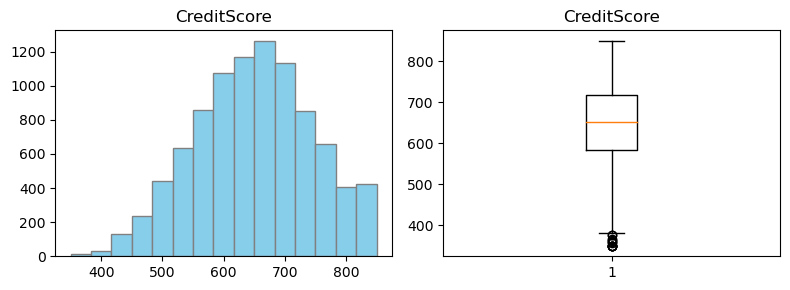

In [42]:
univ_num(df4["CreditScore"],"CreditScore")

In [ ]:
"""
the curve of the plot seems to be like a classic normal distribution

we can see that there no upper outliers

and that there are a lot of value in Q1 and Q3.

The values aren't packed

"""

### 5 - Geography analysis

Plot the distribution (in counts) of the `Geography` column.


In [ ]:
## YOUR ANSWER HERE

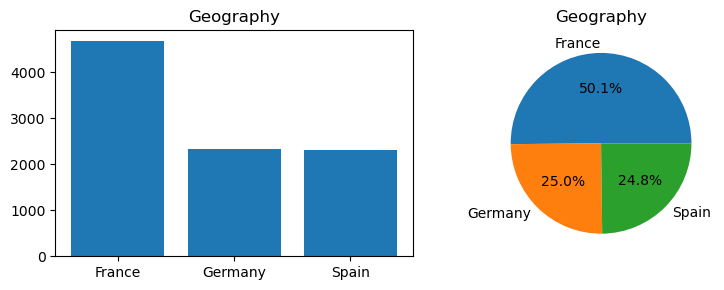

In [43]:
univ_cat(df4["Geography"],"Geography")

### 6 - Correlation analysis

Build a scatter plot matrix for each pair of these quantitative variables (`'Balance', 'CreditScore', 'EstimatedSalary'` => 3x3 matrix)

**Bonus: use the target variable (`Exited`) to color the dots.**

Write in a markdown cell your conclusion from these plots.


In [ ]:
## YOUR ANSWER HERE

In [44]:
new_quant_cols=['Balance', 'CreditScore', 'EstimatedSalary']

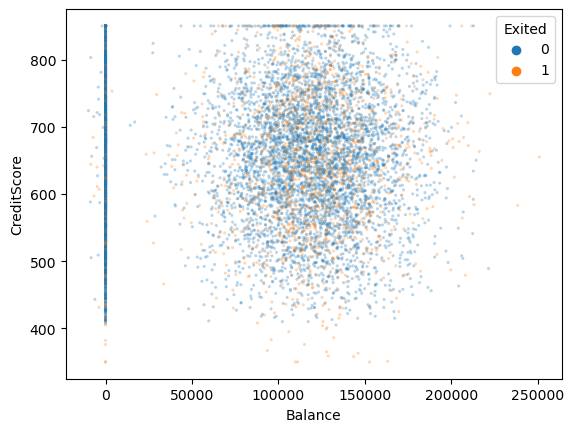

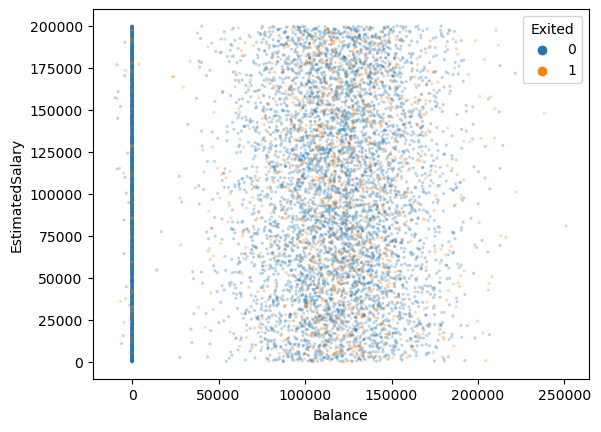

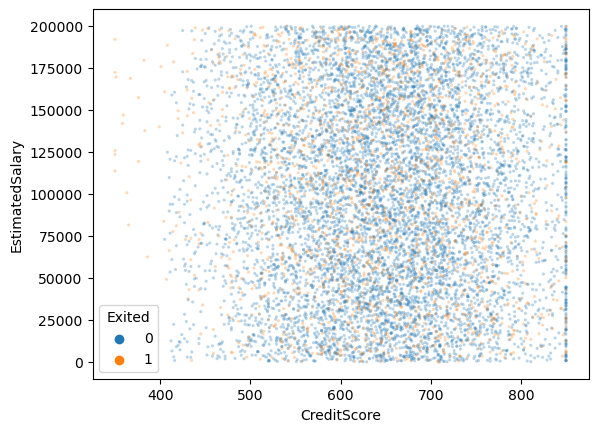

In [53]:
temp=[]

for i in new_quant_cols:
    temp.append(i)
    for j in new_quant_cols:
        if not(j in temp):
            sb.scatterplot(x=i, y=j, data=df, hue='Exited', ec=None, alpha=0.3, s=5)
            plt.show()

### 7 - Contingency tables

Analyze in details the correlations between `IsActiveMember` and `HasCrCard` columns by building a contingency table.

Propose a visual representation of this contingency table.


In [54]:
## YOUR ANSWER HERE
df4.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [57]:
cont_table=pd.crosstab(df['IsActiveMember'],df['HasCrCard'], margins=True)

display(cont_table)

HasCrCard,0,1,All
IsActiveMember,,,
0,1401,3448,4849
1,1544,3607,5151
All,2945,7055,10000


In [61]:
norm_cont_table=pd.crosstab(index=df["IsActiveMember"], columns=df["HasCrCard"], normalize=True, margins=True) * 100
display(norm_cont_table)

HasCrCard,0,1,All
IsActiveMember,,,
0,14.01,34.48,48.49
1,15.44,36.07,51.51
All,29.45,70.55,100.00


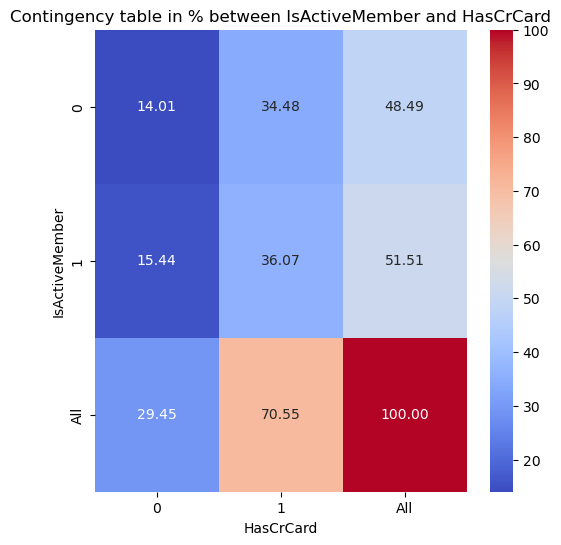

In [64]:
plt.figure(figsize=(6, 6))
sb.heatmap(norm_cont_table, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Contingency table in % between IsActiveMember and HasCrCard')
plt.xticks(rotation=0)
plt.show()

### 8 - Test independence of variables

Perform a statistical independence test for these variables (`IsActiveMember` and `HasCrCard` columns).

Write your interpretation of the test results in a markdown cell.


In [65]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9334 entries, 0 to 9761
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      9334 non-null   float64 
 1   Geography        9334 non-null   category
 2   Gender           9334 non-null   category
 3   Age              9334 non-null   int64   
 4   Tenure           9334 non-null   int64   
 5   Balance          9334 non-null   float64 
 6   NumOfProducts    9334 non-null   category
 7   HasCrCard        9334 non-null   category
 8   IsActiveMember   9334 non-null   category
 9   EstimatedSalary  9334 non-null   float64 
 10  Exited           9334 non-null   int64   
dtypes: category(5), float64(3), int64(3)
memory usage: 556.7 KB


In [69]:
from scipy.stats import chi2, chi2_contingency
x2_dict={}


alpha=0.05

#to use chi2_contingency, i create a new contingency table without the total columns
x2, pvalue, dof, expected_freq = chi2_contingency(pd.crosstab(df4["IsActiveMember"], df4["HasCrCard"]), correction=False)

critical_value = chi2.ppf(1 - alpha, df=dof)

if abs(x2) > critical_value:
    print(
        f"Reject Ho (variables are NOT likely independant)!\n X2={x2:.04f} C={critical_value:.04f} alpha={alpha:.04f} p-value={pvalue:.04f}"
    )
    conclusion="NOT likely independant"

else:
    print(
        f"Cannot reject Ho (variables are likely independant)!\n X2={x2:.04f} C={critical_value:.04f} alpha={alpha:.04f} p-value={pvalue:.04f}"
    )
    conclusion="likely independant"
n=(cont_table.iloc[-1,-1])
print("n ="+str(n))
v_cramer=math.sqrt(x2/(n*(min(cont_table.shape)-1-1)))
print(f"v_cramer={v_cramer}")
x2_dict[str(i)+" / "+str(j)]={"conclusion":conclusion,"x2":x2,"critical_value":critical_value, "alpha":alpha, "pvalue":pvalue,"v_cramer":v_cramer }

test_df_chi=pd.DataFrame.from_dict(x2_dict)
display(test_df_chi)



Cannot reject Ho (variables are likely independant)!
 X2=1.4150 C=3.8415 alpha=0.0500 p-value=0.2342
n =10000
v_cramer=0.011895406348659434


,EstimatedSalary / EstimatedSalary
alpha,0.05
conclusion,likely independant
critical_value,3.841459
pvalue,0.234227
v_cramer,0.011895
x2,1.415007


In [ ]:
"""
H0: "IsActiveMember" and "HasCrCard" are independants
H1: "IsActiveMember" and "HasCrCard" are dependants

Signifiance of the test = alpha = 5%

We can see that X² statistic is smaller than the critical value of the chi-square distribution for a 5% Signifiance.
(indeed: X2=1.4150 < C=3.8415)
So we can't reject H0.
"IsActiveMember" and "HasCrCard" are likely independants

More over we can see the p-value is higher than our Signifiance for the test.
(indeed: alpha=0.0500 < p-value=0.2342)
P-value is more than 4 times alpha.
We had 23% of chance to be to had this conclusion : "IsActiveMember" and "HasCrCard" are likely independants.

Finally, cramer's v = 0.011 = 1%.
So the effect size is very small, negligeable.

Meaning that this test is not 


"""

In [67]:
#bonus: check with researchpy library

import researchpy

crosstab, res = researchpy.crosstab(df4["IsActiveMember"], df4["HasCrCard"], test="chi-square")
crosstab, res

(               HasCrCard            
 HasCrCard              0     1   All
 IsActiveMember                      
 0                   1338  3294  4632
 1                   1411  3291  4702
 All                 2749  6585  9334,
                 Chi-square test  results
 0  Pearson Chi-square ( 1.0) =    1.4150
 1                    p-value =    0.2342
 2               Cramer's phi =    0.0123)

In [ ]:
#why my calculation of v_cramer is not equal to the output of researchpy?
#if i have time, i'll look into it at the end of the exam :)

In [ ]:
## YOUR ANSWER HERE

### 9 - Normal distribution fit

Fit a Normal distribution on the `CreditScore` column.

Write your conclusion from this plot in a markdown cell.


<Axes: >

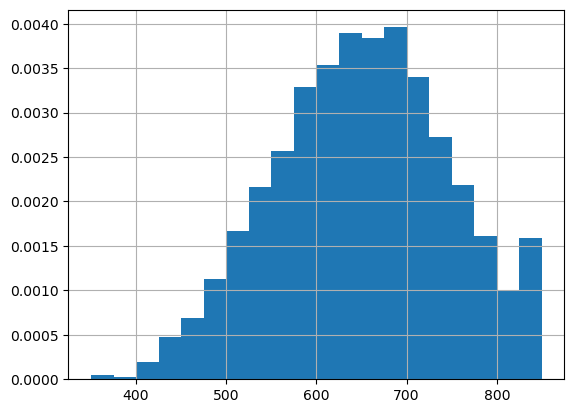

In [78]:
## YOUR ANSWER HERE
data=df4["CreditScore"]
data.hist(density=True, bins=20)

In [73]:
#first Standardize ["CreditScore"]
"""
Standardize data (Z=(X-mu)/sigma)
"""
sm = np.mean(data)
std = math.sqrt(np.var(data, ddof=1))
if std > 0:
    data=[(x - sm) / std for x in data]

In [76]:
def msds_normal_pdf(x, mu, sigma2):
    """
    Compute the normal probability distribution (mean mu and variance sigma2) function at x
    """
    return 1 / math.sqrt(2 * math.pi * sigma2) * math.exp(-0.5 * (x - mu) ** 2 / sigma2)

<Axes: >

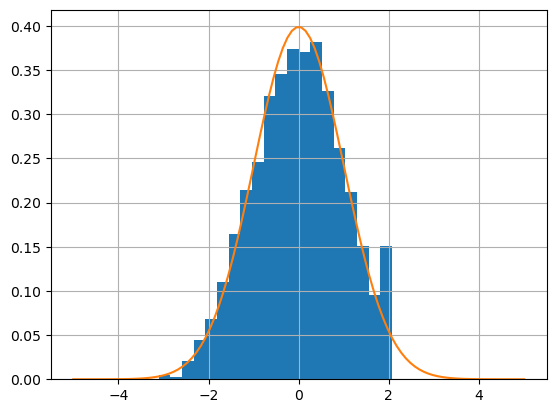

In [77]:
#then i Plot histogram of standardized data and  𝑁(0,1)
plt.figure()
s = pd.Series(data)
s.hist(density=True, bins=20)
X = np.linspace(-5, 5, num=100)
dx = 1


Y = [msds_normal_pdf(x, 0, 1) * dx for x in X]


sb.lineplot(x=X, y=Y, color=sb.color_palette()[1])

In [ ]:
"""
we can see that the distribution of the "CreditScore" is quite the same as a normal distribution N(0,1)

However we can observe:
1/a lack of values near the mean
2/And also we can see that there is a weird peak around 2 and after that peak we can't see anymore values.

This may be caused beacause of a threshold for the credit score or like a maximum score which cannot be beaten
"""